# Аналіз набору даних новобудов у місті Київ

Для створення актуального набору даних із достатньою кількістю категоріальних критеріїв було створено скрапер за допомогою технології Puppeteer.

Дані збираються з веб-сайту lun.ua - найпопулярнішого агрегатору даних про новобудови в Україні.

Для аналізу набору даних використовується бібліотека pandas.

Ціллю збору даних є використання їх для тренування нейронної мережі яка моделює вартість заданого обʼєкту нерухомості із певними характеристками.

#### Словник

Характеристики обʼєкту (англ. Features) - характеристики з яких будуть обрані залежні та незалежні змінні для тренування моделі для знаходження залежності незалежних змінних від залежних.

Форма (англ. Shape) - описана через формат (N, M) де N - кількість рядків, M - кількість комірок

Теплова карта (англ. Heatmap) - формат візуалізації даних кореляції між характеристиками набору даних

#### Предметна Область

##### Залежні змінні/ Незалежні змінні

Залежною змінною є ціна на обʼєкт нерухомості.
Незалежними змінними є множина характеристик обʼєкту нерухомості що включає в себе числові значення та категоріальні дані.

## Ініціалазація бібліотеки Pandas

In [180]:
import pandas as pd
# бібліотека використовується для візуалізації характеристик набору даних та візуалізацій залежності між змінними
import matplotlib.pylab as plt
# бібліотека для візуалізації кореляції між характеристиками у вигляді теплової карти
import seaborn as sns
# використовується для перемішування набору даних для кращого ефекту від тренування моделі
import random
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Приклад записів з набору даних

In [181]:
df = pd.read_csv('./real-estate.csv')
df.shape

(3459, 17)

In [182]:
df.head(3)

,residence,developer,attributes/class,attributes/construction_technology,attributes/walls,attributes/insulation,attributes/heating,attributes/num_apartments,attributes/state,attributes/protected_area,attributes/parking,financials/installmentPlan,financials/installmentPlanTerm,pricePerUnit,price,area,rooms
0,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,116825.0,5023475.0,43,1
1,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,116825.0,6308550.0,54,1
2,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,116825.0,5958075.0,51,1


## Фільтрація набору даних

### Пусті значення

In [183]:
df.isna().sum()

residence                                0
developer                              426
attributes/class                        14
attributes/construction_technology       0
attributes/walls                         0
attributes/insulation                    0
attributes/heating                       0
attributes/num_apartments               10
attributes/state                         0
attributes/protected_area               10
attributes/parking                       0
financials/installmentPlan             572
financials/installmentPlanTerm        2204
pricePerUnit                          1276
price                                 1276
area                                     0
rooms                                    0
dtype: int64

#### Новобудови без ціни

In [184]:
df = df.loc[~df['price'].isna()]

#### Новобудови без розстрочки

In [185]:
df.loc[df['financials/installmentPlanTerm'].isnull(), 'financials/installmentPlanTerm'] = 0

#### Новобудови без вказаного забудовника

In [186]:
df.loc[df['developer'].isnull(), 'developer'] = 'Невідомий Забудовник'

#### Новобудови без інформації про кількість квартир у будинку

In [187]:
df = df.loc[~df['attributes/num_apartments'].isna()]

#### Результат фільтрації

In [188]:
df.isna().sum()

residence                             0
developer                             0
attributes/class                      0
attributes/construction_technology    0
attributes/walls                      0
attributes/insulation                 0
attributes/heating                    0
attributes/num_apartments             0
attributes/state                      0
attributes/protected_area             0
attributes/parking                    0
financials/installmentPlan            0
financials/installmentPlanTerm        0
pricePerUnit                          0
price                                 0
area                                  0
rooms                                 0
dtype: int64

In [189]:
df.shape

(2183, 17)

### NaN значення

In [190]:
df.isnull().sum()

residence                             0
developer                             0
attributes/class                      0
attributes/construction_technology    0
attributes/walls                      0
attributes/insulation                 0
attributes/heating                    0
attributes/num_apartments             0
attributes/state                      0
attributes/protected_area             0
attributes/parking                    0
financials/installmentPlan            0
financials/installmentPlanTerm        0
pricePerUnit                          0
price                                 0
area                                  0
rooms                                 0
dtype: int64

In [191]:
df = df.loc[~df['attributes/num_apartments'].isnull()]

#### Результат фільтрації

In [192]:
df.isnull().sum()

residence                             0
developer                             0
attributes/class                      0
attributes/construction_technology    0
attributes/walls                      0
attributes/insulation                 0
attributes/heating                    0
attributes/num_apartments             0
attributes/state                      0
attributes/protected_area             0
attributes/parking                    0
financials/installmentPlan            0
financials/installmentPlanTerm        0
pricePerUnit                          0
price                                 0
area                                  0
rooms                                 0
dtype: int64

In [193]:
df.shape

(2183, 17)

### Дублікати

In [194]:
df.loc[df.duplicated()]

,residence,developer,attributes/class,attributes/construction_technology,attributes/walls,attributes/insulation,attributes/heating,attributes/num_apartments,attributes/state,attributes/protected_area,attributes/parking,financials/installmentPlan,financials/installmentPlanTerm,pricePerUnit,price,area,rooms
4,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,116825.0,6308550.0,54,1
12,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,106750.0,9394000.0,88,2
13,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,106750.0,9394000.0,88,2
28,ЖК LUCKY LAND,DIM,комфорт,монолітно-каркасна,керамоблок,мінеральна вата,індивідуальне (в квартирі),5183,"без ремонту, з ремонтом",від авто та сторонніх,"гостьовий (2500 паркомісць), підземний з ліфто...",True,3.0,66425.0,1859900.0,28,1
35,ЖК LUCKY LAND,DIM,комфорт,монолітно-каркасна,керамоблок,мінеральна вата,індивідуальне (в квартирі),5183,"без ремонту, з ремонтом",від авто та сторонніх,"гостьовий (2500 паркомісць), підземний з ліфто...",True,3.0,66425.0,3586950.0,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,ЖК Оберіг-2,Київміськбуд,комфорт,монолітно-каркасна,"цегла, газоблок (газобетон)",мінеральна вата,централізоване,820 (2 будинки),без ремонту,ні,"гостьовий, підземний",True,0.0,40550.0,1540900.0,38,1
2854,ЖК Оберіг-2,Київміськбуд,комфорт,монолітно-каркасна,"цегла, газоблок (газобетон)",мінеральна вата,централізоване,820 (2 будинки),без ремонту,ні,"гостьовий, підземний",True,0.0,40550.0,1581450.0,39,1
2866,ЖК Оберіг-2,Київміськбуд,комфорт,монолітно-каркасна,"цегла, газоблок (газобетон)",мінеральна вата,централізоване,820 (2 будинки),без ремонту,ні,"гостьовий, підземний",True,0.0,36450.0,2515050.0,69,2
2871,ЖК Оберіг-2,Київміськбуд,комфорт,монолітно-каркасна,"цегла, газоблок (газобетон)",мінеральна вата,централізоване,820 (2 будинки),без ремонту,ні,"гостьовий, підземний",True,0.0,36950.0,2771250.0,75,3


### Очистка від дублікатів

In [195]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [196]:
df.shape

(1827, 17)

### Приведення типів

In [197]:
df["attributes/num_apartments"] = pd.to_numeric(df["attributes/num_apartments"], errors='coerce')

In [198]:
df.dtypes

residence                              object
developer                              object
attributes/class                       object
attributes/construction_technology     object
attributes/walls                       object
attributes/insulation                  object
attributes/heating                     object
attributes/num_apartments             float64
attributes/state                       object
attributes/protected_area              object
attributes/parking                     object
financials/installmentPlan             object
financials/installmentPlanTerm        float64
pricePerUnit                          float64
price                                 float64
area                                    int64
rooms                                   int64
dtype: object

## Ознайомлення із набором даних

### Форма

In [199]:
df.shape

(1827, 17)

### Типи даних

In [200]:
df.dtypes

residence                              object
developer                              object
attributes/class                       object
attributes/construction_technology     object
attributes/walls                       object
attributes/insulation                  object
attributes/heating                     object
attributes/num_apartments             float64
attributes/state                       object
attributes/protected_area              object
attributes/parking                     object
financials/installmentPlan             object
financials/installmentPlanTerm        float64
pricePerUnit                          float64
price                                 float64
area                                    int64
rooms                                   int64
dtype: object

### Cтатистика

In [201]:
df.describe()

,attributes/num_apartments,financials/installmentPlanTerm,pricePerUnit,price,area,rooms
count,1452.000000,1827.000000,1827.000000,1.827000e+03,1827.000000,1827.000000
mean,1530.763085,1.295567,69474.603175,5.778772e+06,79.166940,2.099617
std,1879.105511,1.807311,40890.805075,5.886273e+06,36.437752,1.022172
min,9.000000,0.000000,23450.000000,2.187000e+05,3.000000,1.000000
25%,321.000000,0.000000,40525.000000,2.775825e+06,51.000000,1.000000
50%,724.000000,0.000000,57275.000000,4.092525e+06,74.000000,2.000000
75%,1898.000000,2.000000,83325.000000,6.800938e+06,98.000000,3.000000
max,8339.000000,7.000000,333700.000000,8.342500e+07,278.000000,5.000000


### Характеристики новобудов

#### Всі характеристики

In [202]:
pd.DataFrame(data=df.columns, columns=['Характеристка обʼєкту нерухомості'])

,Характеристка обʼєкту нерухомості
0,residence
1,developer
2,attributes/class
3,attributes/construction_technology
4,attributes/walls
5,attributes/insulation
6,attributes/heating
7,attributes/num_apartments
8,attributes/state
9,attributes/protected_area


#### Назва житлового комплексу

In [203]:
residential_complex_names = pd.DataFrame(data=df.residence.unique(), columns=['Назва житлового комплексу'])
residential_complex_names

,Назва житлового комплексу
0,ЖК Montreal House
1,БФК А136 Highlight Tower
2,ЖК LUCKY LAND
3,ЖК Метрополіс
4,ЖК Новий Автограф
...,...
144,Клубний будинок Barkey
145,ЖК Клубний будинок-2
146,Клубний будинок „Ідеаліст“
147,ЖК Comfort Club


#### Забудовник

In [204]:
developers = pd.DataFrame(data=df.developer.unique(), columns=['Забудовник'])
developers

,Забудовник
0,Alliance Novobud
1,DIM
2,УМК
3,KSM-GROUP
4,РІЕЛ
5,IB Alliance
6,Stolitsa Group
7,Nice Development
8,Інтергал-Буд
9,Royal House


#### Клас новобудови

In [205]:
building_classes = pd.DataFrame(data=df['attributes/class'].unique(), columns=['Клас новобудови'])
building_classes

,Клас новобудови
0,бізнес
1,комфорт
2,преміум
3,економ


#### Технологія будівництва

In [206]:
technologies = pd.DataFrame(data=df['attributes/construction_technology'].unique(), columns=['Технологія будівництва'])
technologies

,Технологія будівництва
0,монолітно-каркасна
1,"цегляна, монолітно-каркасна"
2,невідомо
3,панельна
4,"цегляна, монолітно-каркасна, панельна"
5,цегляна


#### Матеріал стін

In [207]:
walls = pd.DataFrame(data=df['attributes/walls'].unique(), columns=['Матеріал стін'])
walls

,Матеріал стін
0,цегла
1,керамоблок
2,"цегла, газоблок (газобетон)"
3,газоблок (газобетон)
4,"газоблок (газобетон), керамоблок"
5,залізобетон
6,"керамзитоблок (керамзитобетон), газоблок (газо..."
7,керамзитоблок (керамзитобетон)
8,"цегла, керамоблок"
9,"газоблок (газобетон), залізобетон, цегла"


#### Утелпення стін

In [208]:
insulations = pd.DataFrame(data=df['attributes/insulation'].unique(), columns=['Утелпення стін'])
insulations

,Утелпення стін
0,мінеральна вата
1,пінополістирол (пінопласт)
2,базальтова вата (базальтова плита)
3,"мінеральна вата, пінополістирол (пінопласт)"
4,"пінополістирол (пінопласт), мінеральна вата"
5,без утеплення
6,"пінополістирол (пінопласт), базальтова вата (б..."


#### Опалення

In [209]:
heating_options = pd.DataFrame(data=df['attributes/heating'].unique(), columns=['Опалення'])
heating_options

,Опалення
0,автономне (в будинку)
1,індивідуальне (в квартирі)
2,централізоване
3,"автономне (в будинку), централізоване"
4,"автономне (в будинку), індивідуальне (в квартирі)"


#### Стан ремонту

In [210]:
renovation_states = pd.DataFrame(data=df['attributes/state'].unique(), columns=['Стан ремонту'])
renovation_states

,Стан ремонту
0,без ремонту
1,"без ремонту, під ремонт"
2,"без ремонту, з ремонтом"
3,"під ремонт, з ремонтом"
4,з чорновим ремонтом
5,"без ремонту, під ремонт, з ремонтом"
6,під ремонт
7,з ремонтом
8,"без ремонту, з чорновим ремонтом"
9,"з ремонтом, з чорновим ремонтом"


#### Закрита територія

In [211]:
protected_area_options = pd.DataFrame(data=df['attributes/protected_area'].unique(), columns=['Закрита територія'])
protected_area_options

,Закрита територія
0,від авто та сторонніх
1,від автомобілів
2,ні
3,невідомо


#### Паркінг

In [212]:
pd.DataFrame(data=df['attributes/parking'].unique(), columns=['Паркінг'])

,Паркінг
0,підземний з ліфтом (187 паркомісць)
1,підземний
2,"гостьовий (2500 паркомісць), підземний з ліфто..."
3,"гостьовий, підземний"
4,підземний з ліфтом
5,"гостьовий, підземний (310 паркомісць)"
6,гостьовий
7,наземний багаторівневий
8,підземний з ліфтом (750 паркомісць)
9,наземний багаторівневий (1787 паркомісць)


#### Термін розстрочки

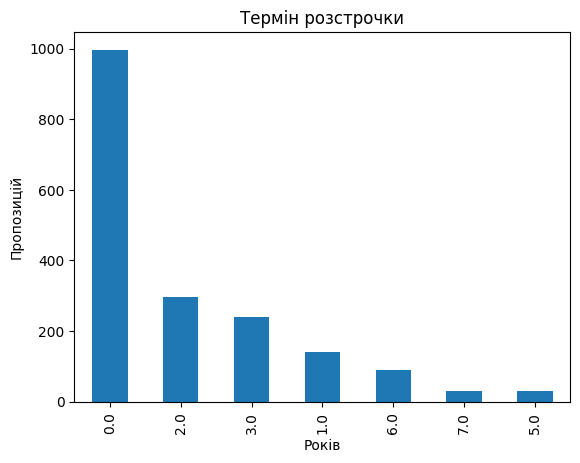

In [213]:
ax = df['financials/installmentPlanTerm'].value_counts().head(10).plot(kind='bar', title='Термін розстрочки')

ax.set_xlabel('Років')
ax.set_ylabel('Пропозицій')

plt.show()

#### Ціна за квадратний метр

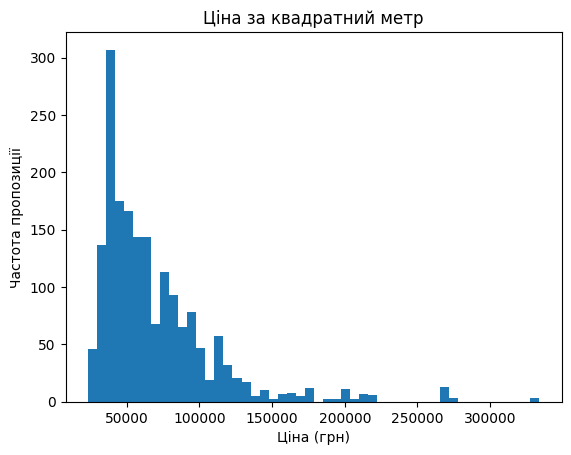

In [214]:
ax = df.copy().sort_values(by='pricePerUnit')['pricePerUnit'].plot(kind='hist', bins=50, title='Ціна за квадратний метр')

ax.set_xlabel('Ціна (грн)')
ax.set_ylabel('Частота пропозиції')

plt.show()

#### Фільтрація цін за квадратний метр (приведення до нормального розподілу)

In [215]:
df = df[~(df['pricePerUnit'] > 230_000)]

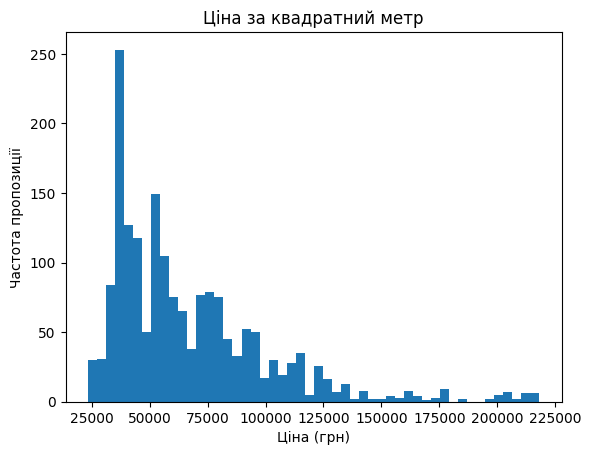

In [216]:
ax = df.copy().sort_values(by='pricePerUnit')['pricePerUnit'].plot(kind='hist', bins=50, title='Ціна за квадратний метр')

ax.set_xlabel('Ціна (грн)')
ax.set_ylabel('Частота пропозиції')

plt.show()

#### Ціна новобудови

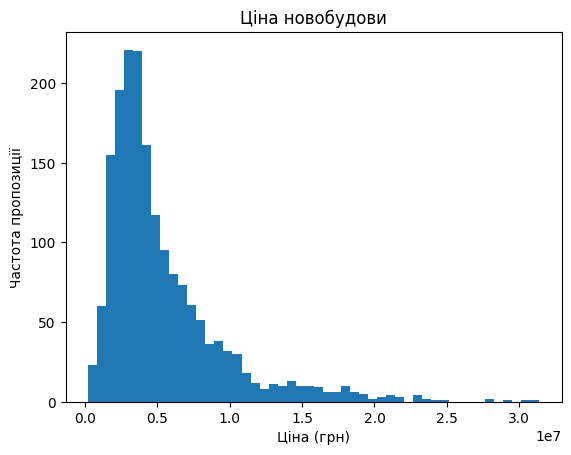

In [217]:
ax = df.copy().sort_values(by='price')['price'].plot(kind='hist', bins=50, title='Ціна новобудови')

ax.set_xlabel('Ціна (грн)')
ax.set_ylabel('Частота пропозиції')

plt.show()

#### Фільтрація цін (приведення до нормального розподілу)

In [218]:
df = df[~(df['price'] > 22000000)] # 22 мільйони гривень

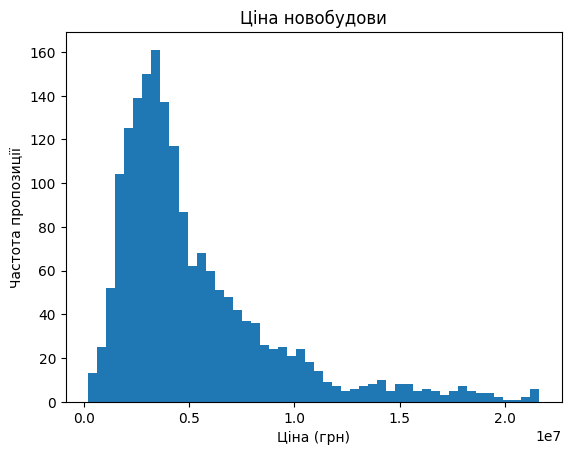

In [219]:
ax = df.copy().sort_values(by='price')['price'].plot(kind='hist', bins=50, title='Ціна новобудови')

ax.set_xlabel('Ціна (грн)')
ax.set_ylabel('Частота пропозиції')

plt.show()

#### Житлова площа

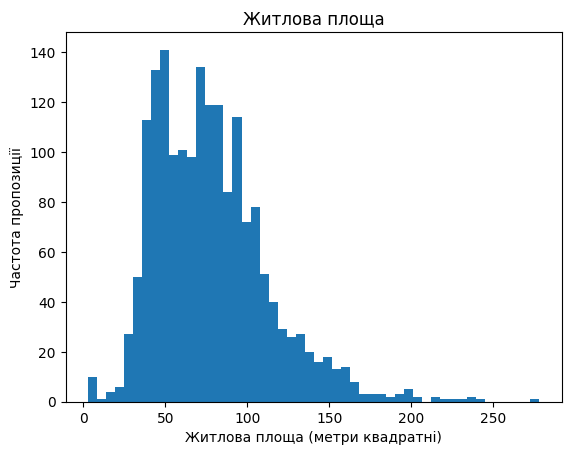

In [220]:
ax = df.copy().sort_values(by='area')['area'].plot(kind='hist', bins=50, title='Житлова площа')

ax.set_xlabel('Житлова площа (метри квадратні)')
ax.set_ylabel('Частота пропозиції')

plt.show()

#### Кількість кімнат

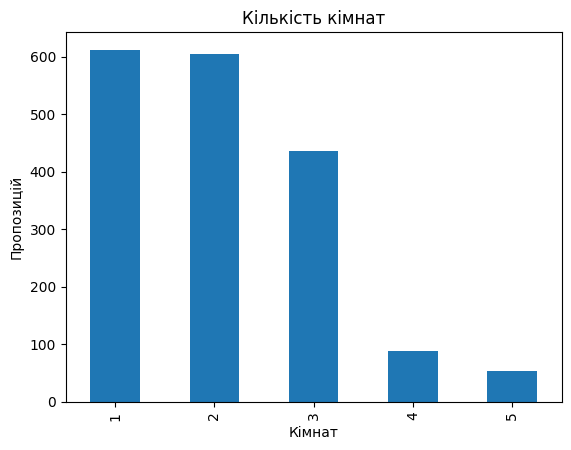

In [221]:
ax = df['rooms'].value_counts().head(10).plot(kind='bar', title='Кількість кімнат')

ax.set_xlabel('Кімнат')
ax.set_ylabel('Пропозицій')

plt.show()

#### Кількість квартир у новобудові

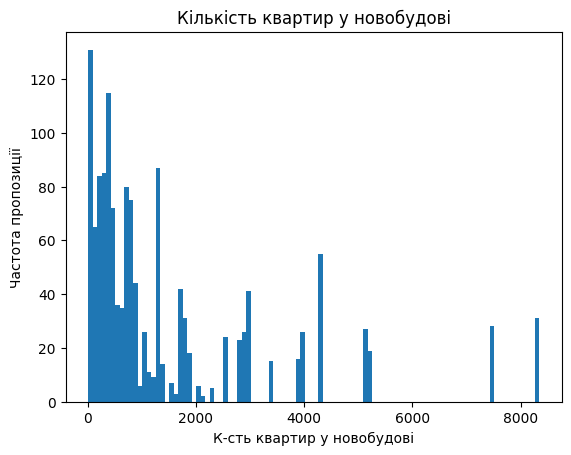

In [222]:
ax = df.copy().sort_values(by='attributes/num_apartments')['attributes/num_apartments'].plot(kind='hist', bins=100, title='Кількість квартир у новобудові')

ax.set_xlabel('К-сть квартир у новобудові')
ax.set_ylabel('Частота пропозиції')

plt.show()

## Залежність між залежними та незалежними змінними (числові значення)

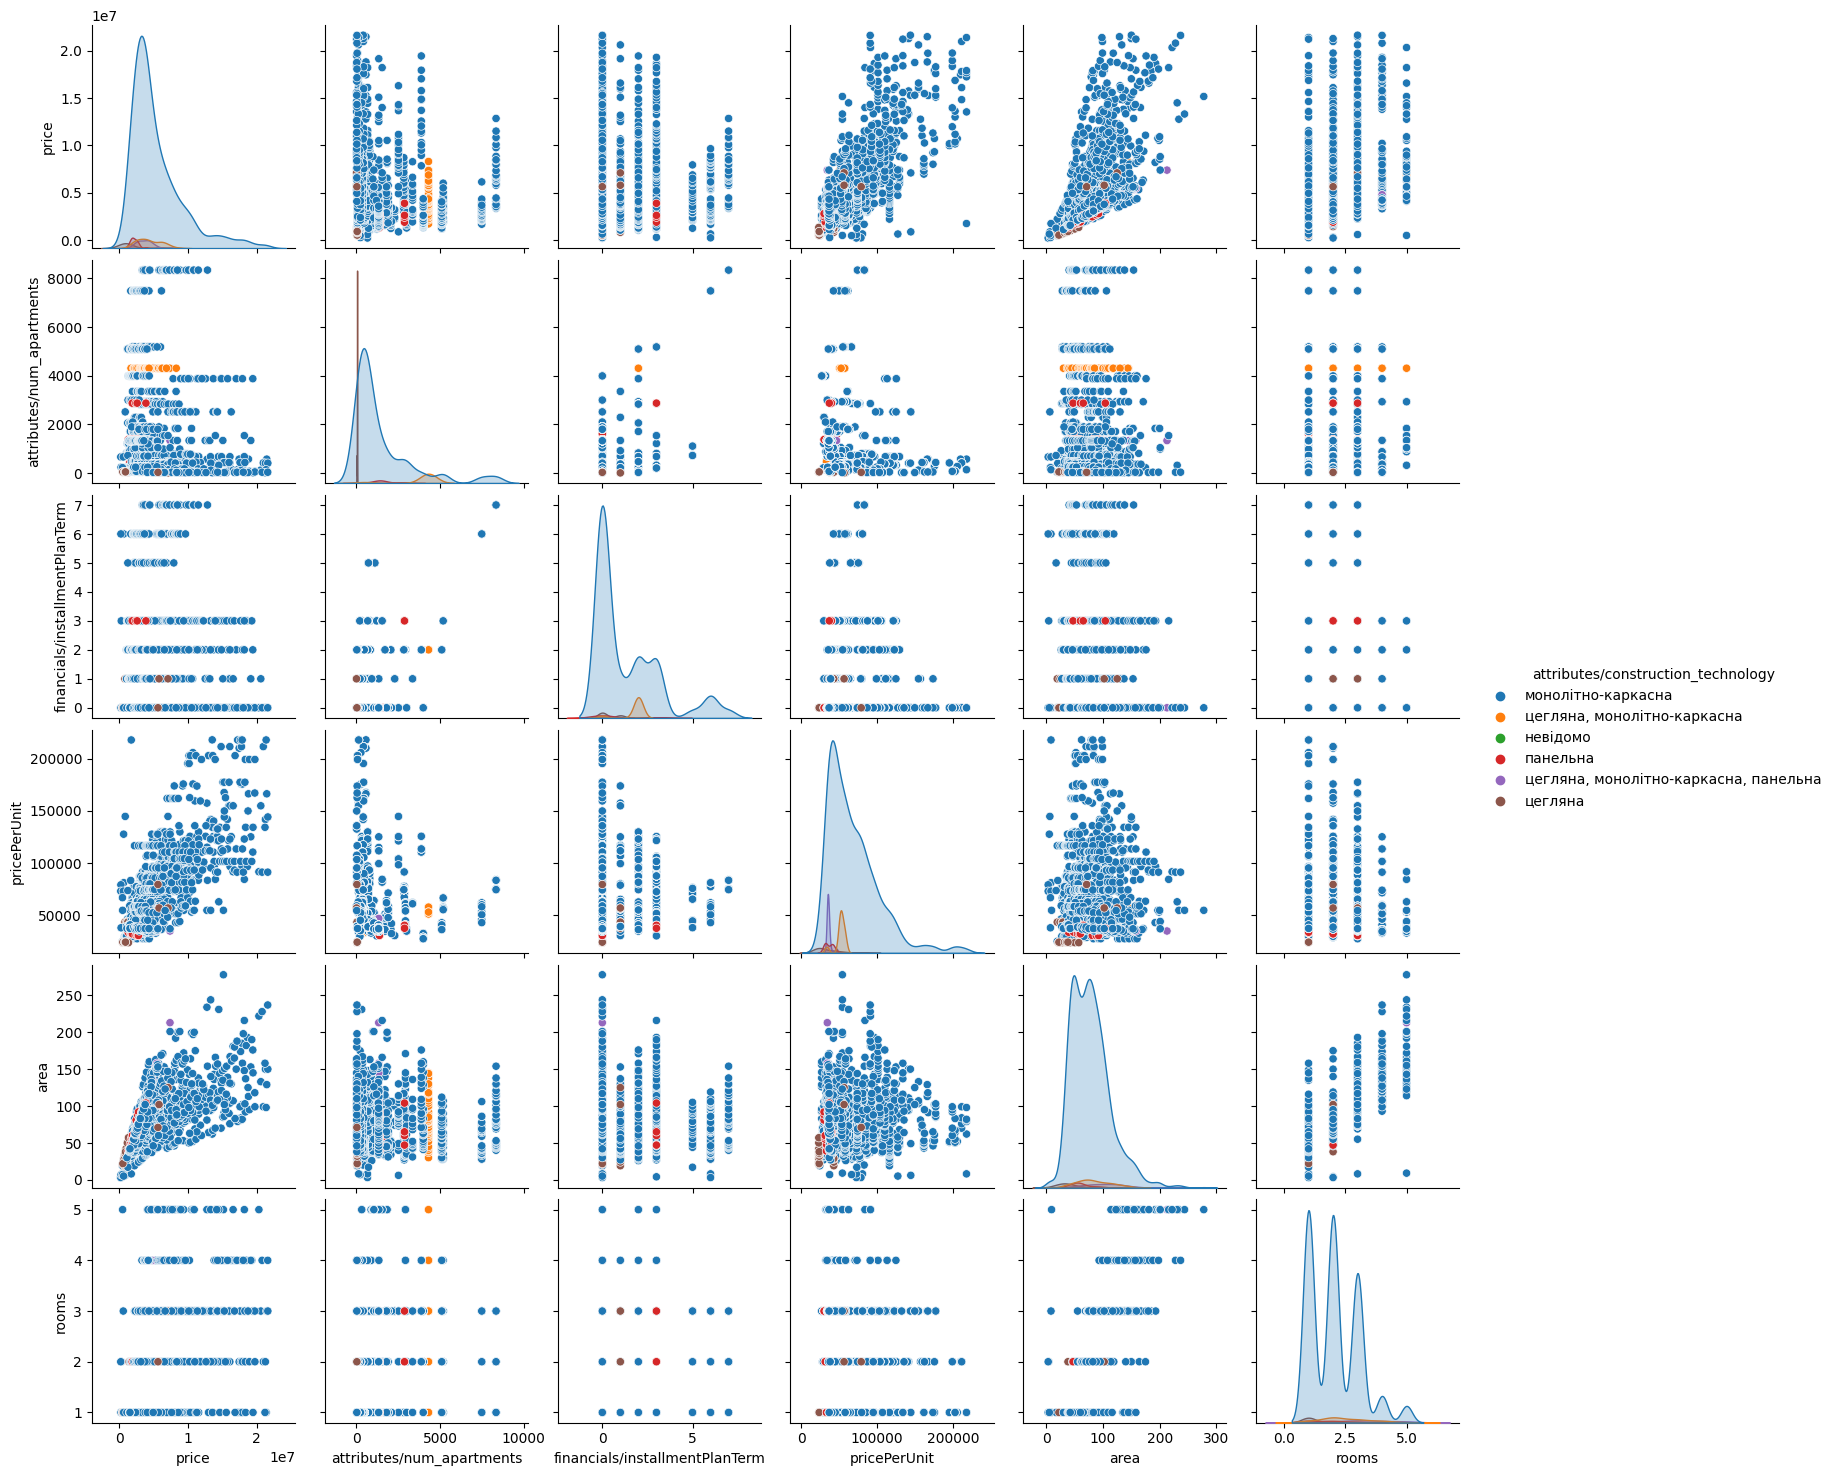

In [223]:
sns.pairplot(df, vars=[
    'price',
    'attributes/num_apartments',
    'financials/installmentPlanTerm',
    'pricePerUnit',
    'area',
    'rooms'
], hue='attributes/construction_technology')

plt.show()

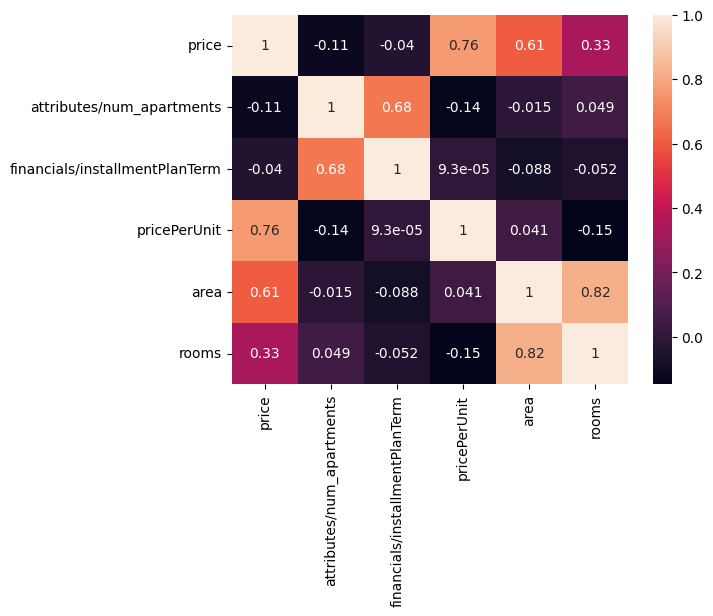

In [224]:
racorr = df[[
    'price',
    'attributes/num_apartments',
    'financials/installmentPlanTerm',
    'pricePerUnit',
    'area',
    'rooms'
]].dropna().corr()

sns.heatmap(data=racorr, annot=True)

plt.show()

## Підготовка даних до використання у нейронній мережі для тренування

### Словник

Мітка (eng. Label) - кінцеве (eng. target) значення що є еталоном для тренувального набору даних

### Оцифровка нечислових значень

Для тренування нейронної мережі, значення всіх характеристик повинні мати числові значення для прорахунку похідної функції втрат при кожній з ітерацій тренувального процесу

In [225]:
df.values[0]

array(['ЖК Montreal House', 'Alliance Novobud', 'бізнес',
       'монолітно-каркасна', 'цегла', 'мінеральна вата',
       'автономне (в будинку)', 328.0, 'без ремонту',
       'від авто та сторонніх', 'підземний з ліфтом (187 паркомісць)',
       True, 1.0, 116825.0, 5023475.0, 43, 1], dtype=object)

#### Допоміжні функції

In [226]:
def df_to_list(df):
    return df.values.flatten().tolist()

In [227]:
# index + 1 використовується для того щоб позначити саме відсутні значення нулем
def apartment_to_numeric(apartment):
    return np.array([
        df_to_list(residential_complex_names).index(apartment[0]),
        df_to_list(developers).index(apartment[1]),
        df_to_list(building_classes).index(apartment[2]),
        df_to_list(technologies).index(apartment[3]),
        df_to_list(walls).index(apartment[4]),
        df_to_list(insulations).index(apartment[5]),
        df_to_list(heating_options).index(apartment[6]),
        # к-сть квартри в новобудові
        apartment[7],
        df_to_list(renovation_states).index(apartment[8]),
        df_to_list(protected_area_options).index(apartment[9]),
        # наявність паркінгу - 1/0
        int(bool(apartment[10])),
        # наявність розстрочки
        int(apartment[11]),
        # термін розстрочки в роках
        apartment[12],
#         # ціна за квадратний метр
#         apartment[13],
#         # ціна квартири
#         apartment[14],
        # площа квартири
        apartment[15],
        # к-сть кімнта
        apartment[16],
    ])

# list(map(apartment_to_numeric, df.values[:3]))

In [228]:
def show_entities(num):
    pd.set_option('display.max_columns', num)
    pd.set_option('display.max_rows', num)

#### Процес оцифровки

In [229]:
df_numeric = df.copy()

df_numeric['residence'] = df_numeric['residence'].map(lambda r: df_to_list(residential_complex_names).index(r))
df_numeric['developer'] = df_numeric['developer'].map(lambda d: df_to_list(developers).index(d))
df_numeric['attributes/class'] = df_numeric['attributes/class'].map(lambda c: df_to_list(building_classes).index(c))
df_numeric['attributes/construction_technology'] = df_numeric['attributes/construction_technology'].map(lambda c: df_to_list(technologies).index(c))
df_numeric['attributes/walls'] = df_numeric['attributes/walls'].map(lambda w: df_to_list(walls).index(w))
df_numeric['attributes/insulation'] = df_numeric['attributes/insulation'].map(lambda i: df_to_list(insulations).index(i))
df_numeric['attributes/heating'] = df_numeric['attributes/heating'].map(lambda h: df_to_list(heating_options).index(h))
df_numeric['attributes/state'] = df_numeric['attributes/state'].map(lambda s: df_to_list(renovation_states).index(s))
df_numeric['attributes/protected_area'] = df_numeric['attributes/protected_area'].map(lambda a: df_to_list(protected_area_options).index(a))
df_numeric['attributes/parking'] = df_numeric['attributes/protected_area'].map(lambda p: int(bool(p)))
df_numeric['financials/installmentPlan'] = df_numeric['financials/installmentPlan'].map(lambda ip: int(ip))

df_numeric

,residence,developer,attributes/class,attributes/construction_technology,attributes/walls,attributes/insulation,attributes/heating,attributes/num_apartments,attributes/state,attributes/protected_area,attributes/parking,financials/installmentPlan,financials/installmentPlanTerm,pricePerUnit,price,area,rooms
0,0,0,0,0,0,0,0,328.0,0,0,0,1,1.0,116825.0,5023475.0,43,1
1,0,0,0,0,0,0,0,328.0,0,0,0,1,1.0,116825.0,6308550.0,54,1
2,0,0,0,0,0,0,0,328.0,0,0,0,1,1.0,116825.0,5958075.0,51,1
3,0,0,0,0,0,0,0,328.0,0,0,0,1,1.0,116825.0,6074900.0,52,1
4,0,0,0,0,0,0,0,328.0,0,0,0,1,1.0,116825.0,6425375.0,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,148,22,1,0,2,0,2,NaN,0,2,1,1,0.0,36950.0,2771250.0,75,3
1823,148,22,1,0,2,0,2,NaN,0,2,1,1,0.0,36950.0,3066850.0,83,3
1824,148,22,1,0,2,0,2,NaN,0,2,1,1,0.0,36950.0,3547200.0,96,3
1825,148,22,1,0,2,0,2,NaN,0,2,1,1,0.0,36950.0,3768900.0,102,3


### Створення набору даних для семплів

In [230]:
df_samples = df_numeric.copy()

df_samples = df_samples.drop(['price', 'pricePerUnit', 'attributes/num_apartments'], axis=1)

X = df_samples.values

X[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1., 43.,
        1.])

In [231]:
X.shape

(1795, 14)

In [232]:
df_samples

,residence,developer,attributes/class,attributes/construction_technology,attributes/walls,attributes/insulation,attributes/heating,attributes/state,attributes/protected_area,attributes/parking,financials/installmentPlan,financials/installmentPlanTerm,area,rooms
0,0,0,0,0,0,0,0,0,0,0,1,1.0,43,1
1,0,0,0,0,0,0,0,0,0,0,1,1.0,54,1
2,0,0,0,0,0,0,0,0,0,0,1,1.0,51,1
3,0,0,0,0,0,0,0,0,0,0,1,1.0,52,1
4,0,0,0,0,0,0,0,0,0,0,1,1.0,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,148,22,1,0,2,0,2,0,2,1,1,0.0,75,3
1823,148,22,1,0,2,0,2,0,2,1,1,0.0,83,3
1824,148,22,1,0,2,0,2,0,2,1,1,0.0,96,3
1825,148,22,1,0,2,0,2,0,2,1,1,0.0,102,3


### Створення набору даних для міток

In [233]:
y = df_numeric['price'].values

y[0]

5023475.0

In [234]:
y.shape

(1795,)

### Нормалізація і стандартизація даних

In [235]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [236]:
X, y = shuffle(X, y)

In [237]:
scaler = MinMaxScaler(feature_range=(0, 1))
# todo: try reshaping it
# X_normalized = scaler.fit_transform(X.reshape(-1, 1))
X_normalized = scaler.fit_transform(X)
y_normalized = scaler.fit_transform(y.reshape(-1, 1))

In [238]:
X_normalized

array([[0.36486486, 0.05454545, 0.33333333, ..., 0.28571429, 0.13818182,
        0.        ],
       [0.2027027 , 0.2       , 0.        , ..., 0.42857143, 0.66181818,
        0.5       ],
       [0.04054054, 0.05454545, 0.33333333, ..., 0.28571429, 0.46181818,
        1.        ],
       ...,
       [0.85135135, 0.96363636, 0.33333333, ..., 0.        , 0.25454545,
        0.25      ],
       [0.30405405, 0.49090909, 0.        , ..., 0.        , 0.19636364,
        0.        ],
       [0.70945946, 0.14545455, 0.        , ..., 0.28571429, 0.24      ,
        0.25      ]])

In [239]:
y_normalized

array([[0.07121792],
       [0.824368  ],
       [0.31073363],
       ...,
       [0.20301641],
       [0.23699892],
       [0.24768652]])

In [240]:
y_normalized.shape

(1795, 1)

# Створення моделі

In [241]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mean_squared_error

In [242]:
learning_rate = 0.0001

### Покращення швидкодії за допомогою GPU

In [243]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print('Num GPUs available: ', len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [244]:
model = Sequential([
    Dense(units=16, input_shape=(14, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='linear'),
])

In [245]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                240       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [246]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Тренування моделі

Бібліотека Keras на цьому кроці також створює валідаційний набір даних за допомогою якого можна оцінити чи нейронна мережа не переходить в режим overfitting

In [247]:
validation_split = 0.1
history = model.fit(x=X_normalized, y=y_normalized, validation_split=validation_split, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
162/162 - 1s - loss: 0.0777 - val_loss: 0.0684 - 758ms/epoch - 5ms/step
Epoch 2/30
162/162 - 0s - loss: 0.0431 - val_loss: 0.0498 - 159ms/epoch - 980us/step
Epoch 3/30
162/162 - 0s - loss: 0.0365 - val_loss: 0.0433 - 149ms/epoch - 917us/step
Epoch 4/30
162/162 - 0s - loss: 0.0328 - val_loss: 0.0386 - 182ms/epoch - 1ms/step
Epoch 5/30
162/162 - 0s - loss: 0.0300 - val_loss: 0.0354 - 191ms/epoch - 1ms/step
Epoch 6/30
162/162 - 0s - loss: 0.0280 - val_loss: 0.0330 - 219ms/epoch - 1ms/step
Epoch 7/30
162/162 - 0s - loss: 0.0263 - val_loss: 0.0309 - 228ms/epoch - 1ms/step
Epoch 8/30
162/162 - 0s - loss: 0.0249 - val_loss: 0.0293 - 174ms/epoch - 1ms/step
Epoch 9/30
162/162 - 0s - loss: 0.0237 - val_loss: 0.0278 - 182ms/epoch - 1ms/step
Epoch 10/30
162/162 - 0s - loss: 0.0226 - val_loss: 0.0266 - 231ms/epoch - 1ms/step
Epoch 11/30
162/162 - 0s - loss: 0.0217 - val_loss: 0.0257 - 242ms/epoch - 1ms/step
Epoch 12/30
162/162 - 0s - loss: 0.0209 - val_loss: 0.0247 - 213ms/epoch - 1ms/st

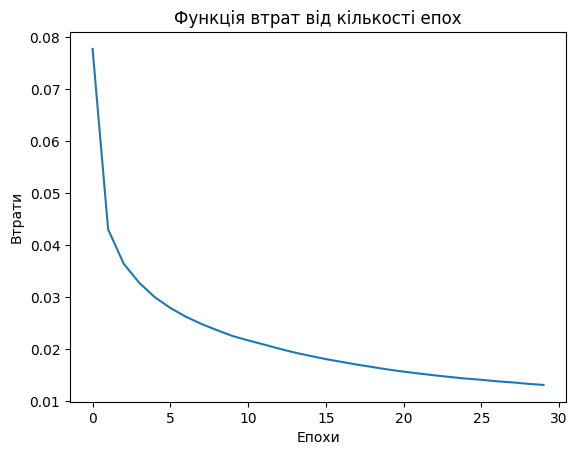

In [248]:
plt.plot(history.history['loss'])
plt.title('Функція втрат від кількості епох')
plt.ylabel('Втрати')
plt.xlabel('Епохи')
plt.show()

# Передбачення моделі

### Вивести на екран таблицю значень для характеристики

In [249]:
def display_characteristic(characteristic, column_name='Характеристика Новобудови'):
    return pd.DataFrame(data=df[characteristic].unique(), columns=[column_name])

In [250]:
display_characteristic('attributes/class')

,Характеристика Новобудови
0,бізнес
1,комфорт
2,преміум
3,економ


### Характеристики нерухомості

In [256]:
residential_complex = 4 # residence
developer = 6 # developer
building_class = 0 # attributes/class
construction_technology = 0 # attributes/construction_technology
wall = 3 #attributes/walls
insulation = 0 # attributes/insulation
heating = 2 # attributes/heating
renovation_sate = 0 # attributes/state
protected_area = 2 # attributes/protected_area
parking = 0 # attributes/parking
installment_plan = 1 # financials/installmentPlan
installment_plan_term = 3 # financials/installmentPlanTerm
area = 45 # area
rooms = 1 # rooms

pred_inputs = np.array([[
    residential_complex,
    developer,
    building_class,
    construction_technology,
    wall,
    insulation,
    heating,
    renovation_sate,
    protected_area,
    parking,
    installment_plan,
    installment_plan_term,
    area,
    rooms
]])

X_to_predict_normalized = scaler.fit_transform(np.concatenate((X, pred_inputs), axis=0))[-1]
Y_to_predict_normalized = scaler.fit_transform(y.reshape(-1, 1))

X_to_predict_normalized

array([0.02702703, 0.10909091, 0.        , 0.        , 0.23076923,
       0.        , 0.5       , 0.        , 0.66666667, 0.        ,
       0.        , 0.42857143, 0.15272727, 0.        ])

In [257]:
y_hat = model.predict(X_to_predict_normalized.reshape(1, -1))
y_hat

1/1 [==============================] - 0s 18ms/step


array([[0.24161285]], dtype=float32)

In [258]:
uah = scaler.inverse_transform(np.concatenate((Y_to_predict_normalized, y_hat), axis=0).reshape(1, -1))[0][-1]
print(f'Вартість нерухомості: {uah:,} грн')

Вартість нерухомості: 5,388,321.057111025 грн
